In [353]:
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

- Restaurant - Number of branches - Locations
- Restaurant - Cuisines
- Restaurant - Popularity (Number of Branches, Votes, Reviews)
- Restaurant - Cost
- Restaurant - Delivery Time


- Cuisine - Number of Branches, Votes, Reviews)
- Group the cuisines into categories - Regional, 
- Popular cuisine
- Pocket friendly cuisine

Location
- Which City/Location    has most eating out culture?
- Pocket friendly
- Delivery time

## Read dataset & inspect

In [354]:
food = pd.read_excel('data/Data_Train.xlsx')
food

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes
...,...,...,...,...,...,...,...,...,...
11089,ID_8067,"BTM Layout 1, Electronic City","Tibetan, Chinese, Continental, Momos",₹250,₹50,4.2,326,189,30 minutes
11090,ID_4620,"Sector 14, Noida",Fast Food,₹100,₹50,3.6,36,16,30 minutes
11091,ID_3392,Majestic,"South Indian, Chinese, North Indian",₹100,₹50,3.5,45,18,30 minutes
11092,ID_4115,"Sector 3, Marathalli",North Indian,₹100,₹50,3.1,24,9,30 minutes


In [355]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11094 entries, 0 to 11093
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Restaurant     11094 non-null  object
 1   Location       11094 non-null  object
 2   Cuisines       11094 non-null  object
 3   Average_Cost   11094 non-null  object
 4   Minimum_Order  11094 non-null  object
 5   Rating         11094 non-null  object
 6   Votes          11094 non-null  object
 7   Reviews        11094 non-null  object
 8   Delivery_Time  11094 non-null  object
dtypes: object(9)
memory usage: 780.2+ KB


In [356]:
food.describe()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
count,11094,11094,11094,11094,11094,11094,11094,11094,11094
unique,7480,35,2179,26,18,33,1103,761,7
top,ID_7184,"Mico Layout, Stage 2, BTM Layout,Bangalore",North Indian,₹200,₹50,-,-,-,30 minutes
freq,22,947,850,3241,10118,1191,2074,2312,7406


In [357]:
food.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",₹200,₹50,3.5,12,4,30 minutes
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",₹100,₹50,3.5,11,4,30 minutes
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",₹150,₹50,3.6,99,30,65 minutes
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",₹250,₹99,3.7,176,95,30 minutes
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",₹200,₹99,3.2,521,235,65 minutes


In [358]:
len(food['Restaurant'].unique().tolist())

7480

## Preporcessing
- Convert to correct format
- Handle Missing/invalid value

- Average_Cost : Convert to int
- Rating, Votes, Reviews : 
    - Convert to int
    - All non-ints --> NaNs --> 0

In [359]:
# Delivery_time
print(food['Delivery_Time'].head(3))
food['Delivery_Time'] = food['Delivery_Time'].apply(lambda x: str(x.replace(' minutes','')))
food['Delivery_Time'] = pd.to_numeric(food['Delivery_Time'], errors='coerce')
food['Delivery_Time'].isnull().sum()
print(food.shape[0])
food.dropna(inplace=True)
print(food.shape[0])
food['Delivery_Time'].head(3)

0    30 minutes
1    30 minutes
2    65 minutes
Name: Delivery_Time, dtype: object
11094
11094


0    30
1    30
2    65
Name: Delivery_Time, dtype: int64

In [360]:
# Average_Cost
print(food['Average_Cost'].head(3))
food['Average_Cost'] = food['Average_Cost'].apply(lambda x: str(x[1:].replace(',','')))
food['Average_Cost'] = pd.to_numeric(food['Average_Cost'], errors='coerce')
food['Average_Cost'].isnull().sum()
print(food.shape[0])
food.dropna(inplace=True)
print(food.shape[0])
food['Average_Cost'].head(3)

0    ₹200
1    ₹100
2    ₹150
Name: Average_Cost, dtype: object
11094
11093


0    200.0
1    100.0
2    150.0
Name: Average_Cost, dtype: float64

In [361]:
# Rating, Votes, Reviews
food['Rating'] = pd.to_numeric(food['Rating'], errors='coerce')
food['Votes'] = pd.to_numeric(food['Votes'], errors='coerce')
food['Reviews'] = pd.to_numeric(food['Reviews'], errors='coerce')
print(food[['Rating','Votes','Reviews']].isnull().sum())
food[['Rating','Votes','Reviews']] = food[['Rating','Votes','Reviews']].fillna(0)
print(food[['Rating','Votes','Reviews']].isnull().sum())

Rating     1962
Votes      2073
Reviews    2311
dtype: int64
Rating     0
Votes      0
Reviews    0
dtype: int64


In [362]:
food.dtypes

Restaurant        object
Location          object
Cuisines          object
Average_Cost     float64
Minimum_Order     object
Rating           float64
Votes            float64
Reviews          float64
Delivery_Time      int64
dtype: object

In [363]:
# Extract city from the location and add it as a column

## food_location

In [364]:
food.groupby(by='Location').agg({'Restaurant':'count'}).sort_values(by='Restaurant', ascending=False)

,Restaurant
Location,
"Mico Layout, Stage 2, BTM Layout,Bangalore",947
"D-Block, Sector 63, Noida",806
"Sector 1, Noida",791
"FTI College, Law College Road, Pune",584
Delhi University-GTB Nagar,545
"Laxman Vihar Industrial Area, Sector 3A, Gurgoan",493
"Sector 14, Noida",489
"Delhi Administration Flats, Timarpur",472
Mumbai Central,459


In [365]:
#food['City'] = food['Location'].apply(lambda x : len(x.split(',')))
food['City'] = food['Location'].apply(lambda x: x.split(',')[-1].strip() if len(x.split(',')) > 0 else x.split(',')[0].strip())
food.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,₹50,3.5,12.0,4.0,30,Pune
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,₹50,3.5,11.0,4.0,30,Marathalli
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,₹50,3.6,99.0,30.0,65,Mumbai Central
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,₹99,3.7,176.0,95.0,30,Noida
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,₹99,3.2,521.0,235.0,65,Whitefield


In [366]:
food['City'].value_counts()

Noida                         2086
Pune                          1358
Bangalore                      947
Mumbai CST Area                661
Kolkata                        546
Delhi University-GTB Nagar     545
Gurgoan                        493
Timarpur                       472
Mumbai Central                 459
Whitefield                     457
India Gate                     411
Marathalli                     366
Majestic                       334
Delhi Cantt.                   326
Maharashtra                    307
Hyderabad                      294
Delhi                          282
Pune University                277
Gurgaon                        260
Mumbai                         109
Begumpet                        81
Electronic City                 22
Name: City, dtype: int64

In [367]:
def getCity(x):
    if x in ['Mumbai CST Area', 'Mumbai Central', 'Maharashtra']: return 'Mumbai'
    if x in ['Delhi University-GTB Nagar', 'Timarpur','India Gate', 'Delhi Cantt.' ]: return 'Delhi'
    if x in ['Whitefield','Marathalli', 'Majestic', 'Electronic City' ]: return 'Bangalore'
    if x in ['Begumpet']: return 'Hyderabad'
    if x in ['Gurgoan']: return 'Gurgaon'
    if x in ['Pune University']: return 'Pune'
    return x
    

food['City'] = food['City'].apply(lambda x: getCity(x))

In [368]:
food['City'].value_counts()

Bangalore    2126
Noida        2086
Delhi        2036
Pune         1635
Mumbai       1536
Gurgaon       753
Kolkata       546
Hyderabad     375
Name: City, dtype: int64

In [369]:
food.to_csv("out/restaurant.csv")

In [370]:
food_city = food.groupby(by='City').agg({'Restaurant':'count', 'Average_Cost': np.average, 'Rating': np.average, 'Votes': np.average, 'Reviews': np.average}).round(2)
print(food_city.sort_values(by='Restaurant', ascending=False))
print(food_city.sort_values(by='Average_Cost', ascending=False))

           Restaurant  Average_Cost  Rating   Votes  Reviews
City                                                        
Bangalore        2126        192.29    3.05  199.05    96.42
Noida            2086        204.79    2.89  161.93    84.20
Delhi            2036        205.89    2.95  201.52   103.45
Pune             1635        216.82    3.01  246.58   123.00
Mumbai           1536        223.40    3.07  236.86   119.99
Gurgaon           753        201.66    2.75  103.08    49.54
Kolkata           546        161.45    2.95  230.99   105.48
Hyderabad         375        148.80    3.07  170.25    28.81
           Restaurant  Average_Cost  Rating   Votes  Reviews
City                                                        
Mumbai           1536        223.40    3.07  236.86   119.99
Pune             1635        216.82    3.01  246.58   123.00
Delhi            2036        205.89    2.95  201.52   103.45
Noida            2086        204.79    2.89  161.93    84.20
Gurgaon           753   

In [371]:
bins = [0, 1, 2, 3, 4, 5]
labels = ['0-1','1-2','2-3','3-4','4-5']
food['Rating_bins'] = pd.cut(food['Rating'], bins, labels=labels)
food['Rating_bins'] = food['Rating_bins'].cat.add_categories('NoRating')
food['Rating_bins'] = food['Rating_bins'].fillna('NoRating')
#food.loc[food['Rating_bins'].isnull(), 'Rating_bins'] = 'NoRating'
food.head()

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,Rating_bins
0,ID_6321,"FTI College, Law College Road, Pune","Fast Food, Rolls, Burger, Salad, Wraps",200.0,₹50,3.5,12.0,4.0,30,Pune,3-4
1,ID_2882,"Sector 3, Marathalli","Ice Cream, Desserts",100.0,₹50,3.5,11.0,4.0,30,Bangalore,3-4
2,ID_1595,Mumbai Central,"Italian, Street Food, Fast Food",150.0,₹50,3.6,99.0,30.0,65,Mumbai,3-4
3,ID_5929,"Sector 1, Noida","Mughlai, North Indian, Chinese",250.0,₹99,3.7,176.0,95.0,30,Noida,3-4
4,ID_6123,"Rmz Centennial, I Gate, Whitefield","Cafe, Beverages",200.0,₹99,3.2,521.0,235.0,65,Bangalore,3-4


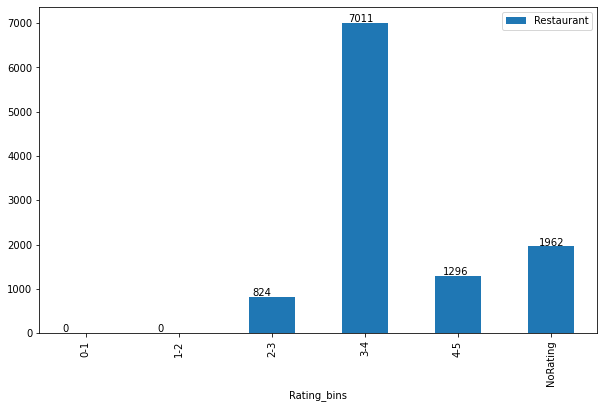

In [373]:
food_rating = food.groupby(by=['Rating_bins']).agg({'Restaurant':'count'})
ax = food_rating.plot.bar(figsize=(10,6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x()*1.025, p.get_height()+20))

In [378]:
food_mico = food[food['Location']=='Mico Layout, Stage 2, BTM Layout,Bangalore'] 
food_mico

,Restaurant,Location,Cuisines,Average_Cost,Minimum_Order,Rating,Votes,Reviews,Delivery_Time,City,Rating_bins
25,ID_4944,"Mico Layout, Stage 2, BTM Layout,Bangalore","Desserts, Ice Cream",100.0,₹50,0.0,0.0,0.0,45,Bangalore,NoRating
47,ID_2809,"Mico Layout, Stage 2, BTM Layout,Bangalore",Chinese,200.0,₹50,0.0,0.0,0.0,30,Bangalore,NoRating
58,ID_156,"Mico Layout, Stage 2, BTM Layout,Bangalore","Rolls, Chinese",100.0,₹50,3.7,18.0,6.0,30,Bangalore,3-4
67,ID_8414,"Mico Layout, Stage 2, BTM Layout,Bangalore","Desserts, Beverages, American",200.0,₹50,3.9,51.0,29.0,45,Bangalore,3-4
92,ID_5076,"Mico Layout, Stage 2, BTM Layout,Bangalore","South Indian, North Indian",100.0,₹50,3.7,27.0,5.0,30,Bangalore,3-4
...,...,...,...,...,...,...,...,...,...,...,...
11027,ID_5321,"Mico Layout, Stage 2, BTM Layout,Bangalore","Biryani, Hyderabadi, North Indian, Mughlai",100.0,₹99,0.0,0.0,0.0,30,Bangalore,NoRating
11030,ID_7380,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese",100.0,₹50,3.2,5.0,1.0,30,Bangalore,3-4
11033,ID_4722,"Mico Layout, Stage 2, BTM Layout,Bangalore",Fast Food,100.0,₹50,0.0,0.0,0.0,45,Bangalore,NoRating
11071,ID_3344,"Mico Layout, Stage 2, BTM Layout,Bangalore","North Indian, Chinese",200.0,₹50,3.6,24.0,3.0,30,Bangalore,3-4


                           Restaurant  Restaurant_pc
Rating_bins Delivery_Time                           
0-1         20                      0            0.0
            30                      0            0.0
            45                      0            0.0
            65                      0            0.0
            120                     0            0.0
1-2         20                      0            0.0
            30                      0            0.0
            45                      0            0.0
            65                      0            0.0
            120                     0            0.0
2-3         20                      0            0.0
            30                     16           45.7
            45                     12           34.3
            65                      7           20.0
            120                     0            0.0
3-4         20                      2            0.3
            30                    396         

<AxesSubplot:xlabel='Rating_bins,Delivery_Time'>

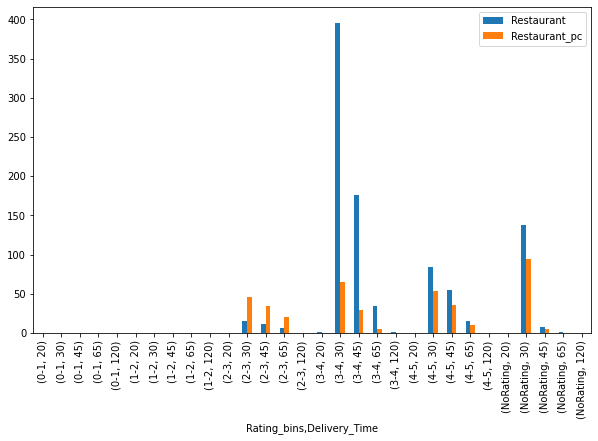

In [390]:
food_mico_ = food_mico.groupby(by=['Rating_bins', 'Delivery_Time']).agg({'Restaurant':'count'}) #
#print(food_mico_)
food_mico_pc = food_mico_.groupby(level=0).apply(lambda x: round(100 * x / float(x.sum()),1))
food_mico_pc = food_mico__.fillna(0)
food_mico_pc.columns = ['Restaurant_pc']
#food_mico_pc

food_mico_summary = pd.concat([food_mico_, food_mico_pc],axis=1)
print(food_mico_summary)

food_mico_summary.plot.bar(figsize=(10,6))#
#food_mico.plot.bar(y='Delivery_Time_pc', figsize=(10,6))

In [394]:
food.shape[0]

11093

                           Restaurant  Restaurant_pc
Rating_bins Delivery_Time                           
0-1         10                      0            0.0
            20                      0            0.0
            30                      0            0.0
            45                      0            0.0
            65                      0            0.0


<AxesSubplot:xlabel='Rating_bins,Delivery_Time'>

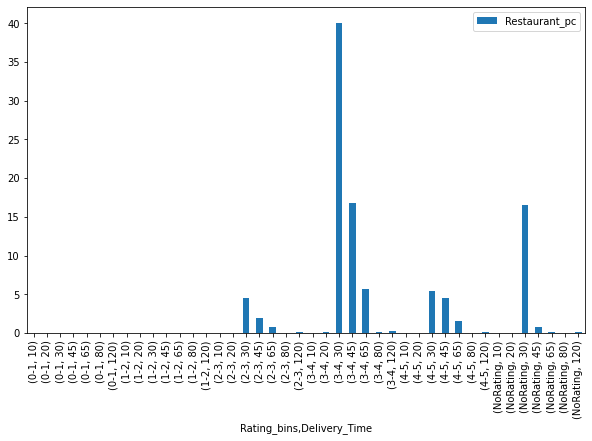

In [396]:
food_ = food.groupby(by=['Rating_bins', 'Delivery_Time']).agg({'Restaurant':'count'}) #
#print(food_mico_)
food_pc = food_.groupby(level=0).apply(lambda x: round(100 * x / 11093,1)) #float(x.sum()),1))
food_pc = food_pc.fillna(0)
food_pc.columns = ['Restaurant_pc']

food_summary = pd.concat([food_, food_pc],axis=1)
print(food_summary.head())

food_summary.plot.bar(y = ['Restaurant_pc'], figsize=(10,6))#

                                           Restaurant  Restaurant_pc
Location                      Rating_bins                           
BTM Layout 1, Electronic City 0-1                   0            0.0
                              1-2                   0            0.0
                              2-3                   0            0.0
                              3-4                  13            0.1
                              4-5                   9            0.1


<AxesSubplot:xlabel='Location'>

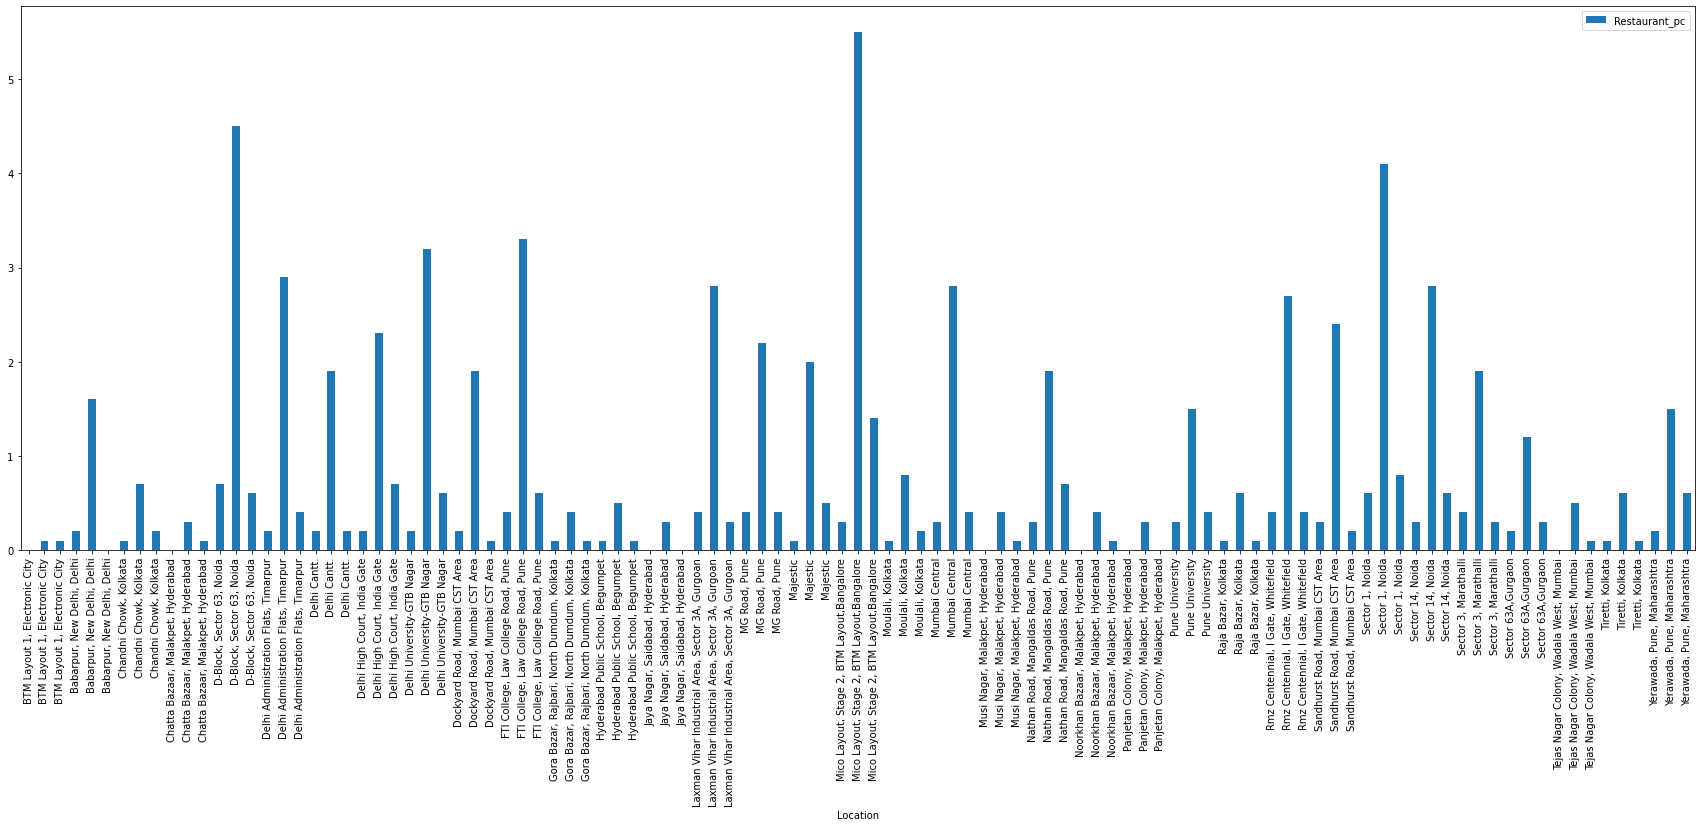

In [404]:
food_ = food.groupby(by=['Location', 'Rating_bins']).agg({'Restaurant':'count'}) # , 'Delivery_Time']
food_pc = food_.groupby(level=0).apply(lambda x: round(100 * x / 11093,1)) #float(x.sum()),1))
food_pc = food_pc.fillna(0)
food_pc.columns = ['Restaurant_pc']

food_summary = pd.concat([food_, food_pc],axis=1)
print(food_summary.head())

food_summary = food_summary.reset_index()
food_summary[food_summary['Rating_bins'].isin(['2-3','3-4','4-5'])]
food_summary[food_summary['Rating_bins'].isin(['2-3','3-4','4-5'])].plot.bar(x='Location', y = ['Restaurant_pc'], figsize=(30,10))#

In [407]:
print(food['Average_Cost'].min(), food['Average_Cost'].max(), food['Average_Cost'].median(), food['Average_Cost'].mean())

50.0 2050.0 200.0 202.7089155323177


## food_restaurant

In [ ]:
food.columns

### food_restaurant_cuisine

In [ ]:
food_restaurant_1 = food.groupby(by=['Restaurant', 'Cuisines']).agg({'Cuisines':'count', 'City': 'nunique', 'Rating':np.average, 'Votes': np.average, 'Reviews':np.average}).round(2)
food_restaurant_1.rename(columns={'Cuisines':'Count'}, inplace=True)
food_restaurant_1.reset_index(inplace=True)
print(food_restaurant_1.sort_values(by='Count', ascending=False))

In [ ]:
print(food_restaurant_1.sort_values(by='Count', ascending=False)[:10])

In [ ]:
food_restaurant_1.columns

In [ ]:
food_restaurant_1[food_restaurant_1['Restaurant'].isin(['ID_7184','ID_7295','ID_4625'])]

### food_restaurant

In [ ]:
food_restaurant = food.groupby(by='Restaurant').agg({'Cuisines':'count', 'City': 'nunique', 'Average_Cost': np.average, 
                                                        'Rating':np.average, 'Votes': np.average, 'Reviews':np.average}).round(2)
food_restaurant.rename(columns={'Cuisines':'Count'}, inplace=True)
print(food_restaurant.sort_values(by='Count', ascending=False))

In [ ]:
print(food_restaurant.sort_values(by='Rating', ascending=False))

In [ ]:
food_restaurant['Rating'].value_counts().to_frame().reset_index().rename(columns={'Rating':'Count', 'index':'Rating'}).sort_values(by='Rating',ascending=False)

In [ ]:
## Bin the rating and plot rating to number of restaurants

In [ ]:
food_restaurant[food_restaurant['Rating']==4.9].reset_index()#.join(food, how='left', on='Restaurant', lsuffix='_l')

In [ ]:
food[food['Restaurant']=='ID_7184']

In [ ]:
food_restaurant.to_csv("out/food_restaurant.csv")

## food_categories

In [ ]:
cuisines_ = food['Cuisines'].value_counts().index.tolist()
cuisines = []
for c in cuisines_:
    cuisines.extend([i.strip() for i in c.split(',')])
cuisines = list(set(cuisines))
cuisines = sorted(cuisines)
print(len(cuisines), cuisines)

In [ ]:
cuisines_ = food['Cuisines'].value_counts().index.tolist()
cuisines_restaurants_ = {}
for c in cuisines_:
    for i in c.split(','):
        cuisine = i.strip()
        if cuisine in cuisines_restaurants_.keys():
            cuisines_restaurants_[cuisine] += 1
        else:
            cuisines_restaurants_[cuisine] = 1   
cuisines_restaurants_ = dict(sorted(cuisines_restaurants_.items(), key=lambda item: item[1], reverse=True))   
print(len(cuisines_restaurants_), cuisines_restaurants_)
cuisines_restaurants = pd.DataFrame(list(zip(cuisines_restaurants_.keys(), cuisines_restaurants_.values())), columns=['Cuisine','Number of Restaurants'])
cuisines_restaurants.head()
cuisines_restaurants.to_csv('out/cuisines_restaurants.csv')

In [ ]:
food_Categories = {   
    'Indian - Regional' : ['Andhra', 'Assamese', 'Awadhi','Bengali', 'Bihari', 'Chettinad',  'Kashmiri','Kerala', 'Goan', 'Gujarati', 'Hyderabadi', 
                        'Konkan',  'Lucknowi', 'Maharashtrian', 'Malwani', 'Mangalorean','Naga','North Eastern', 'North Indian', 'Odia','Rajasthani',
                         'South Indian', 'Tamil' ],
    'International' : ['Afghan', 'African', 'American', 'Arabian', 'Asian', 'Bangladeshi', 'Belgian', 'Brazilian','Burmese', 'Cantonese', 'Chinese', 
                    'European','French', 'German', 'Greek', 'Indonesian', 'Iranian', 'Israeli', 'Italian', 'Japanese', 'Korean', 'Lebanese',
                    'Malaysian', 'Mediterranean', 'Mexican', 'Middle Eastern',  'Nepalese', 'Portuguese', 'South American', 'Spanish', 'Sri Lankan',
                    'Thai', 'Tibetan', 'Turkish', 'Vietnamese']
}   

''' 
 BBQ', 'Bakery',  'Bar Food',  'Beverages', 'Biryani', 'Bohri',  'Bubble Tea', 'Burger', 
 'Cafe', 'Charcoal Chicken',  'Coffee', 'Continental', 'Desserts', 'Fast Food', 'Finger Food', 'Frozen Yogurt', 
   'Healthy Food', 'Hot dogs', 'Ice Cream', 'Indian',  'Juices', 'Kebab', 
   'Mishti', 'Mithai', 'Modern Indian', 'Momos', 
  'Mughlai',  'Paan', 'Parsi', 'Pizza', 'Poké',  'Raw Meats', 'Roast Chicken', 
  'Rolls', 'Salad', 'Sandwich', 'Seafood', 'Steak', 'Street Food', 'Sushi', 'Tea', 'Tex-Mex',  'Wraps'''

In [ ]:
def getCategory(x):
    #print(x.split(','))
    for i in x.split(','):
        if i in food_Categories['Indian - Regional']:
            return 'Indian'
        if i in food_Categories['International']:
            return 'International'
    return 'No Idea'
        

food['category'] = food['Cuisines'].apply(lambda x: getCategory(x))
food.head()

In [ ]:
food[food['category'] == 'Indian']

In [ ]:
food[food['category'] == 'International']

In [ ]:
food[food['category'] == 'No Idea'].shape[0]

In [ ]:
food['Cuisines']